# Análisis exploratorio de incidencia delictiva en México

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

In [51]:
df_pob.columns
df_pob.head()
df_completo = pd.merge(df, df_pob, on='Entidad')
import pandas as pd

# 1️⃣ Cargar población correctamente (usa ; como separador)
df_pob = pd.read_csv(
    'data/poblacion_entidades_2015.csv',
    sep=';',
    encoding='latin-1'
)

# 2️⃣ Verificar columnas
print("Columnas en Población:", df_pob.columns)

# 3️⃣ Hacer merge con delitos
df_completo = pd.merge(df, df_pob, on='Entidad')

print("Merge realizado correctamente")

# 4️⃣ Convertir población a numérico por seguridad
df_completo['Poblacion'] = pd.to_numeric(
    df_completo['Poblacion'],
    errors='coerce'
)

# 5️⃣ Ejemplo: calcular tasa anual por 100,000 habitantes
df_completo['Tasa_Total_Delitos'] = (
    df_completo['Total_Anual'] / df_completo['Poblacion']
) * 100000

df_completo.head()

Columnas en Población: Index(['Unnamed: 0', 'Cve_Entidad', 'Entidad', 'Poblacion'], dtype='str')
Merge realizado correctamente


,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,...,Septiembre,Octubre,Noviembre,Diciembre,Total_Anual,Total_Delitos,Unnamed: 0,Cve_Entidad,Poblacion,Tasa_Total_Delitos
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,...,2.0,2.0,2.0,1.0,18.0,18.0,0,1,1312544.0,1.371383
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,...,0.0,0.0,0.0,1.0,5.0,5.0,0,1,1312544.0,0.380940
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,...,2.0,0.0,0.0,0.0,12.0,12.0,0,1,1312544.0,0.914255
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2,0,0,...,0.0,0.0,0.0,0.0,3.0,3.0,0,1,1312544.0,0.228564
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0,1,1312544.0,0.076188


#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

In [35]:
colima_2018 = df[(df['Entidad'] == 'Colima') & 
                 (df['Año'] == 2018) & 
                 (df['Tipo de delito'] == 'Homicidio doloso')]
total_colima = colima_2018[meses].sum().sum()
print(f"Homicidios dolosos en Colima (2018): {total_colima}")
robos_2019 = df[(df['Año'] == 2019) & 
                (df['Tipo de delito'] == 'Robo de vehículo automotor')]

total_robos = robos_2019[meses].sum().sum()
print(f"Total robos de vehículo en 2019: {total_robos}")
delitos_interes = ['Homicidio doloso', 'Feminicidio']

suma_anual = df[df['Tipo de delito'].isin(delitos_interes)].groupby(['Año', 'Tipo de delito'])[meses].sum().sum(axis=1)
print(suma_anual)
df_fem = df[df['Tipo de delito'] == 'Feminicidio']

max_valor = df_fem[meses].max().max()

mes_max = df_fem[meses].max().idxmax()

fila_max = df_fem[df_fem[mes_max] == max_valor].iloc[0]

print(f"El mayor número fue {max_valor} en el municipio de {fila_max['Entidad']} (mes: {mes_max}).")
df_fem = df[df['Tipo de delito'] == 'Feminicidio']

df_fem_copia = df_fem.copy()
df_fem_copia['Total_Anual'] = df_fem_copia[meses].sum(axis=1)

resultado = df_fem_copia.groupby(['Año', 'Entidad'])['Total_Anual'].sum().idxmax()
valor_max_anual = df_fem_copia.groupby(['Año', 'Entidad'])['Total_Anual'].sum().max()

print(f"El máximo anual fue en el estado de {resultado[1]} en el año {resultado[0]} con {valor_max_anual} casos.")

Homicidios dolosos en Colima (2018): 0.0
Total robos de vehículo en 2019: 0.0
Año   Tipo de delito
2015  Feminicidio       413.0
2016  Feminicidio       608.0
2017  Feminicidio       744.0
2018  Feminicidio       899.0
2019  Feminicidio       944.0
2020  Feminicidio       947.0
2021  Feminicidio       981.0
2022  Feminicidio       961.0
2023  Feminicidio       832.0
2024  Feminicidio       401.0
dtype: float64
El mayor número fue 16.0 en el municipio de Veracruz de Ignacio de la Llave (mes: Abril).
El máximo anual fue en el estado de México en el año 2020 con 151.0 casos.


#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

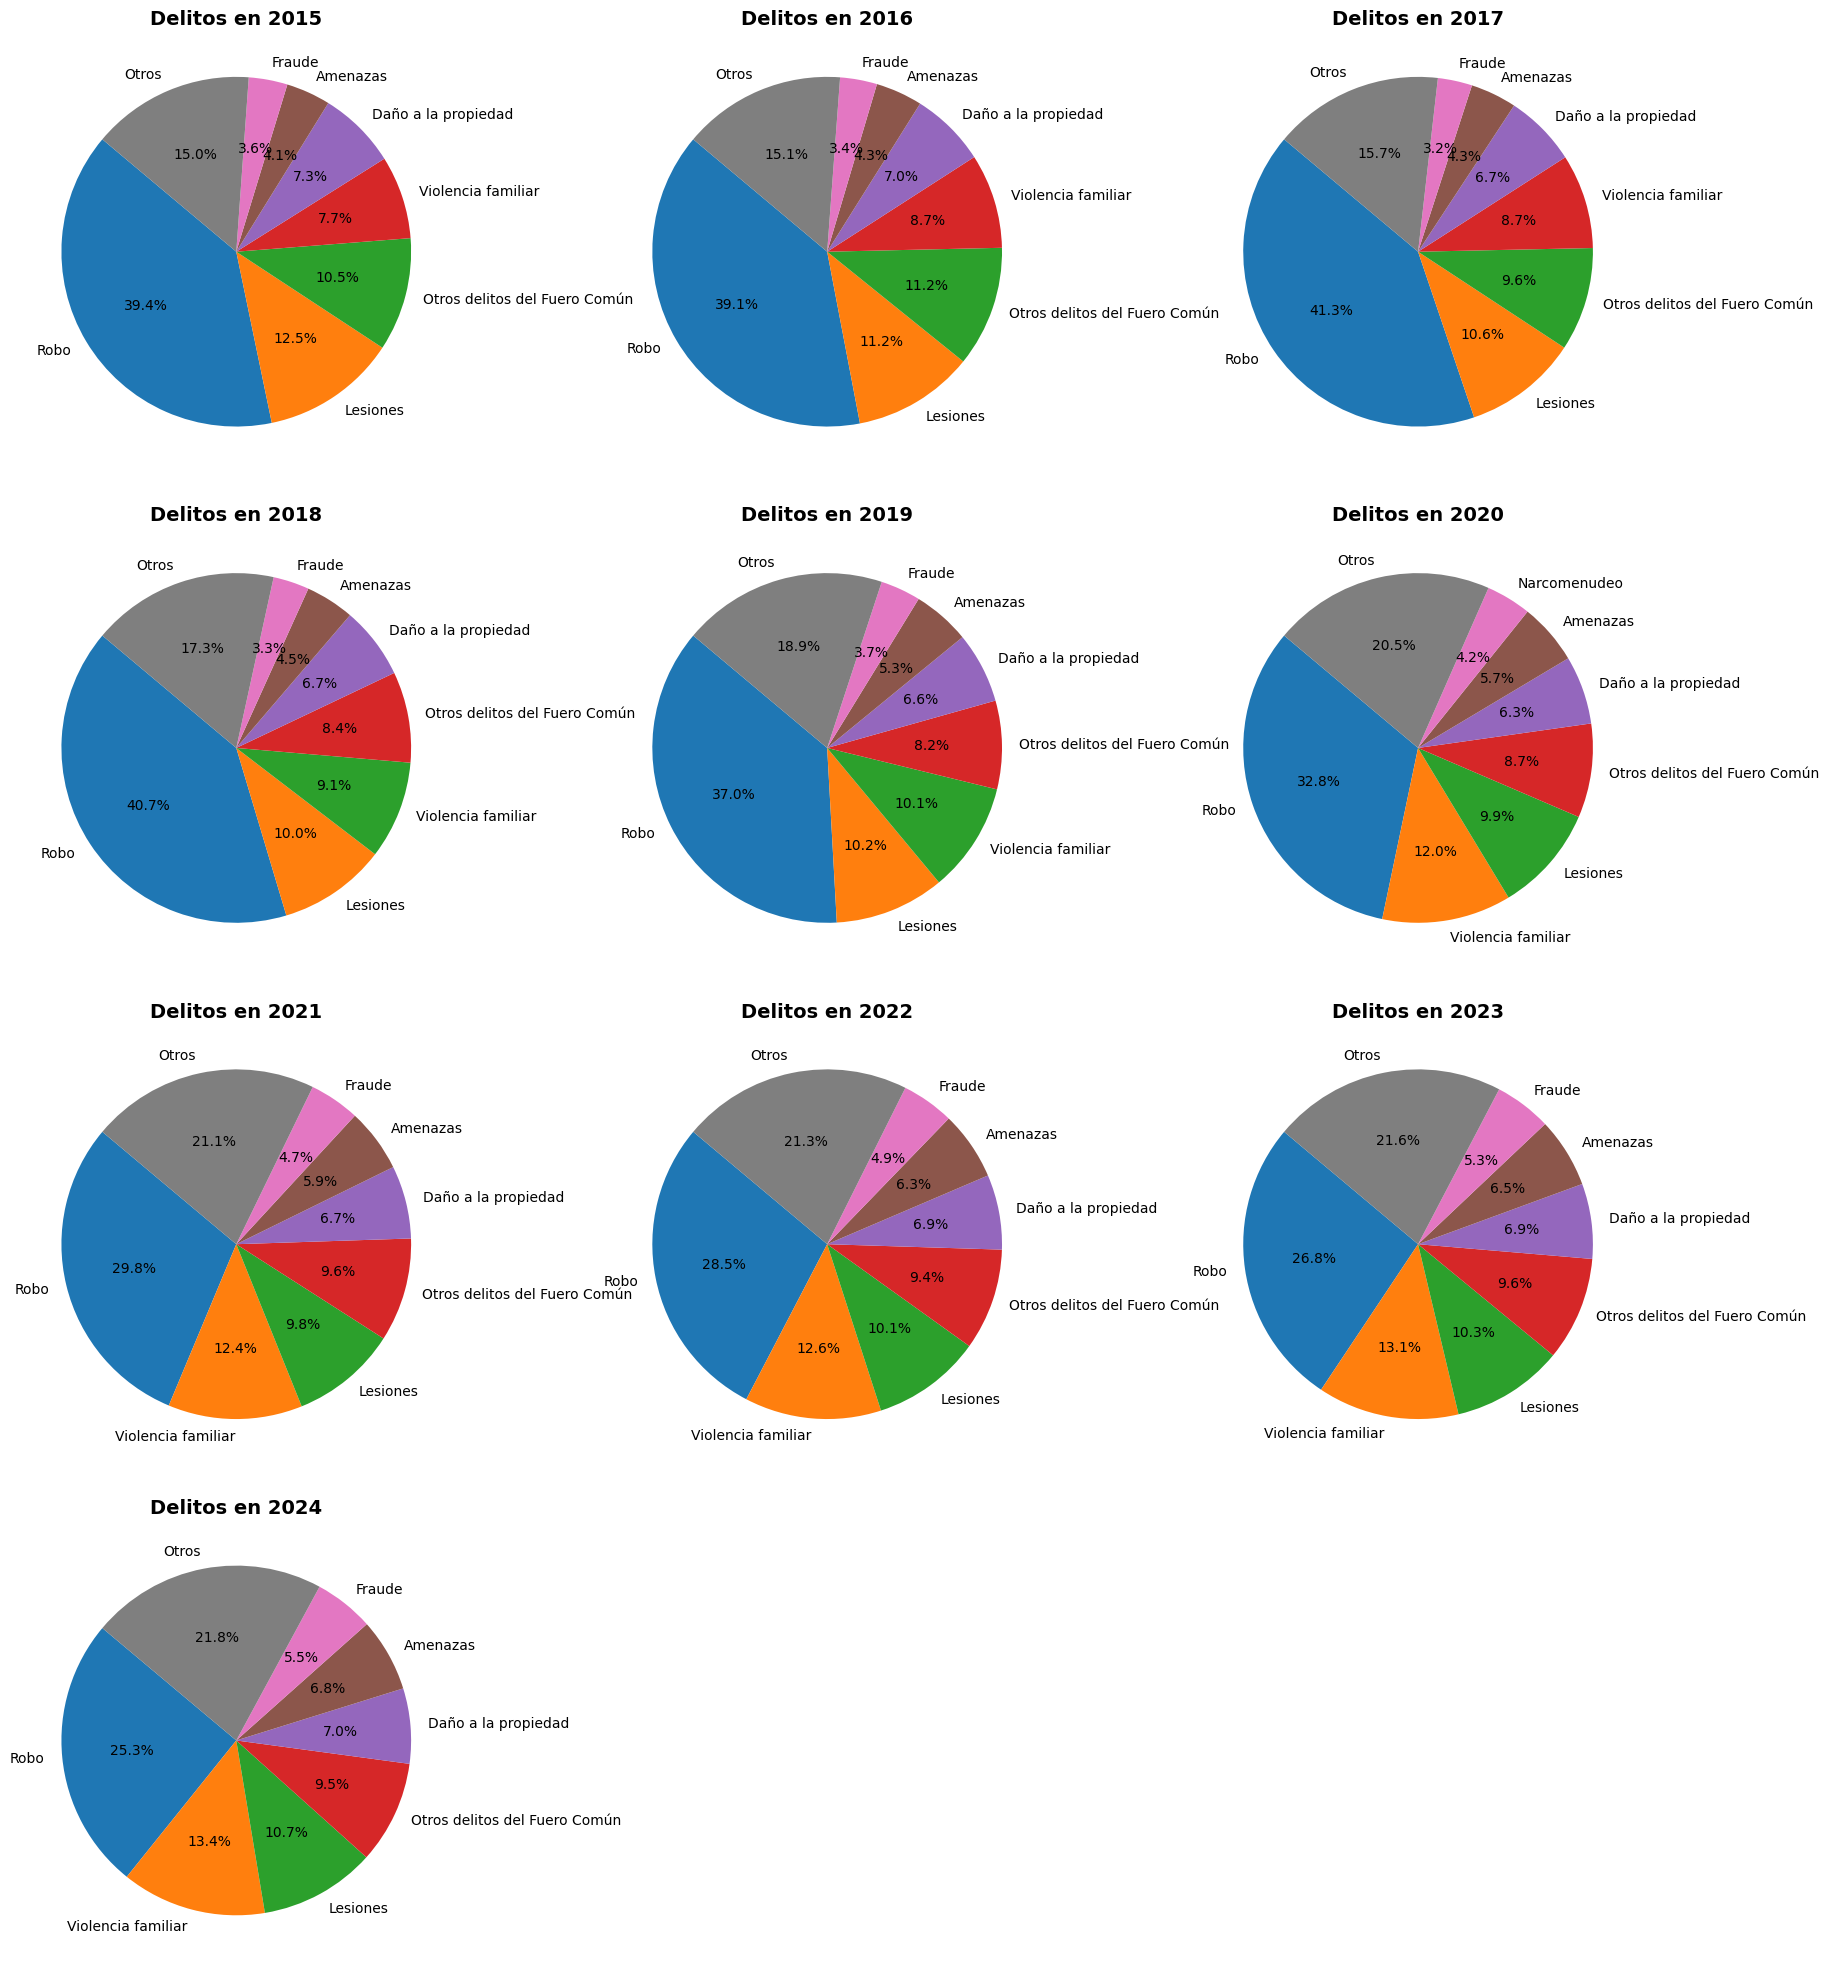

In [39]:
import matplotlib.pyplot as plt
import math

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df['Total_Anual'] = df[meses].sum(axis=1)
años = sorted(df['Año'].unique())
n_años = len(años)
cols = 3
filas = math.ceil(n_años / cols)
fig, axes = plt.subplots(nrows=filas, ncols=cols, figsize=(18, 5 * filas))
axes = axes.flatten() # Esto convierte la matriz en una lista simple [0, 1, 2...]

for i, año in enumerate(años):
    
    data_año = df[df['Año'] == año].groupby('Tipo de delito')['Total_Anual'].sum()
    top_delitos = data_año.nlargest(7)
    otros = pd.Series({'Otros': data_año.sum() - top_delitos.sum()})
    final_data = pd.concat([top_delitos, otros])
    
    axes[i].pie(final_data, labels=final_data.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Delitos en {año}', fontsize=14, fontweight='bold')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [ ]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()